In [5]:
import numpy as np
import pandas as pd
import re

In [6]:
df = pd.read_csv(r"C:\Users\User\Documents\GitHub\Praxisprojekt_Modul_2.2_Breakout2\Daten_Aufgabe_1 - Shopauswertung.csv", sep=";")
df

,Datum,Produkt,Umsatz
0,01.01.2021,A,17.132115
1,02.01.2021,A,57.353725
2,03.01.2021,A,114.746857
3,04.01.2021,A,113.251181
4,05.01.2021,A,4.186462
...,...,...,...
1090,27.12.2021,A+B+C,197909.241600
1091,28.12.2021,A+B+C,198014.840500
1092,29.12.2021,A+B+C,198355.276000
1093,30.12.2021,A+B+C,199081.446100


In [7]:
df_A = df[df["Produkt"]=="A"].copy()
df_A.rename(columns={"Umsatz":"Umsatz_A_Ausland"}, inplace=True)
df_A = df_A.drop("Produkt",axis=1)
df_A

,Datum,Umsatz_A_Ausland
0,01.01.2021,17.132115
1,02.01.2021,57.353725
2,03.01.2021,114.746857
3,04.01.2021,113.251181
4,05.01.2021,4.186462
...,...,...
360,27.12.2021,48.681712
361,28.12.2021,54.774542
362,29.12.2021,151.450508
363,30.12.2021,39.406492


In [8]:
df_B = df[df["Produkt"]=="B"].copy()
df_B.rename(columns={"Umsatz":"Umsatz_B_Ausland"}, inplace=True)
df_B = df_B.drop("Produkt",axis=1)
df_B

,Datum,Umsatz_B_Ausland
365,01.01.2021,189.467425
366,02.01.2021,286.467425
367,03.01.2021,346.467425
368,04.01.2021,441.467425
369,05.01.2021,445.467425
...,...,...
725,27.12.2021,18261.467430
726,28.12.2021,18325.467430
727,29.12.2021,18368.467430
728,30.12.2021,18467.467430


In [9]:
df_gesamt = df[df["Produkt"]=="A+B+C"].copy()
df_gesamt.rename(columns={"Umsatz":"Umsatz_gesamt_Ausland"}, inplace=True)
df_gesamt = df_gesamt.copy()
df_gesamt = df_gesamt.drop("Produkt", axis=1)
df_gesamt.dtypes

Datum                     object
Umsatz_gesamt_Ausland    float64
dtype: object

In [10]:
df_gesamt = df_gesamt.merge(df_A)
df_gesamt

,Datum,Umsatz_gesamt_Ausland,Umsatz_A_Ausland
0,01.01.2021,18598.65588,17.132115
1,02.01.2021,18809.41684,57.353725
2,03.01.2021,19247.89036,114.746857
3,04.01.2021,19511.08905,113.251181
4,05.01.2021,20047.04458,4.186462
...,...,...,...
360,27.12.2021,197909.24160,48.681712
361,28.12.2021,198014.84050,54.774542
362,29.12.2021,198355.27600,151.450508
363,30.12.2021,199081.44610,39.406492


In [11]:
df_gesamt.dtypes

Datum                     object
Umsatz_gesamt_Ausland    float64
Umsatz_A_Ausland         float64
dtype: object

In [12]:

df_gesamt = df_gesamt.merge(df_B)
df_gesamt
#df = df_gesamt.copy()

,Datum,Umsatz_gesamt_Ausland,Umsatz_A_Ausland,Umsatz_B_Ausland
0,01.01.2021,18598.65588,17.132115,189.467425
1,02.01.2021,18809.41684,57.353725,286.467425
2,03.01.2021,19247.89036,114.746857,346.467425
3,04.01.2021,19511.08905,113.251181,441.467425
4,05.01.2021,20047.04458,4.186462,445.467425
...,...,...,...,...
360,27.12.2021,197909.24160,48.681712,18261.467430
361,28.12.2021,198014.84050,54.774542,18325.467430
362,29.12.2021,198355.27600,151.450508,18368.467430
363,30.12.2021,199081.44610,39.406492,18467.467430


In [13]:
df_gesamt["Umsatz_B_Ausland"] = df_gesamt['Umsatz_B_Ausland'].diff().fillna(0)

#df_gesamt = df_gesamt.drop("Umsatz_B_Ausland", axis=1)
#df_gesamt = df_gesamt.rename(columns={"Umsatz_B":"Umsatz_B_Ausland"})
#df_gesamt["Umsatz_gesamt_Ausland"] = df_gesamt["Umsatz_gesamt_Ausland"].diff().fillna(0)
#df_gesamt["Umsatz_gesamt_Ausland"][0]= df_gesamt["Umsatz_gesamt_Ausland"].median
df_backup = df_gesamt.copy()
df_backup

,Datum,Umsatz_gesamt_Ausland,Umsatz_A_Ausland,Umsatz_B_Ausland
0,01.01.2021,18598.65588,17.132115,0.0
1,02.01.2021,18809.41684,57.353725,97.0
2,03.01.2021,19247.89036,114.746857,60.0
3,04.01.2021,19511.08905,113.251181,95.0
4,05.01.2021,20047.04458,4.186462,4.0
...,...,...,...,...
360,27.12.2021,197909.24160,48.681712,15.0
361,28.12.2021,198014.84050,54.774542,64.0
362,29.12.2021,198355.27600,151.450508,43.0
363,30.12.2021,199081.44610,39.406492,99.0


In [14]:
df_gesamt["Umsatz_B_Ausland"][0] = df_gesamt['Umsatz_B_Ausland'].median()
df_gesamt

C:\Users\User\AppData\Local\Temp\ipykernel_8212\1396479324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gesamt["Umsatz_B_Ausland"][0] = df_gesamt['Umsatz_B_Ausland'].median()


,Datum,Umsatz_gesamt_Ausland,Umsatz_A_Ausland,Umsatz_B_Ausland
0,01.01.2021,18598.65588,17.132115,50.000005
1,02.01.2021,18809.41684,57.353725,97.000000
2,03.01.2021,19247.89036,114.746857,60.000000
3,04.01.2021,19511.08905,113.251181,95.000000
4,05.01.2021,20047.04458,4.186462,4.000000
...,...,...,...,...
360,27.12.2021,197909.24160,48.681712,15.000000
361,28.12.2021,198014.84050,54.774542,64.000000
362,29.12.2021,198355.27600,151.450508,43.000000
363,30.12.2021,199081.44610,39.406492,99.000000


In [15]:
df_gesamt["Umsatz_gesamt_Ausland"] = df_gesamt["Umsatz_gesamt_Ausland"].diff().fillna(0)

In [16]:
df_backup = df_gesamt.copy()
df_gesamt

,Datum,Umsatz_gesamt_Ausland,Umsatz_A_Ausland,Umsatz_B_Ausland
0,01.01.2021,0.00000,17.132115,50.000005
1,02.01.2021,210.76096,57.353725,97.000000
2,03.01.2021,438.47352,114.746857,60.000000
3,04.01.2021,263.19869,113.251181,95.000000
4,05.01.2021,535.95553,4.186462,4.000000
...,...,...,...,...
360,27.12.2021,858.86110,48.681712,15.000000
361,28.12.2021,105.59890,54.774542,64.000000
362,29.12.2021,340.43550,151.450508,43.000000
363,30.12.2021,726.17010,39.406492,99.000000


In [17]:
df_gesamt["Umsatz_gesamt_Ausland"][0] = df_gesamt["Umsatz_gesamt_Ausland"].median()
df_backup = df_gesamt.copy()
df_gesamt


C:\Users\User\AppData\Local\Temp\ipykernel_8212\3215055936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gesamt["Umsatz_gesamt_Ausland"][0] = df_gesamt["Umsatz_gesamt_Ausland"].median()


,Datum,Umsatz_gesamt_Ausland,Umsatz_A_Ausland,Umsatz_B_Ausland
0,01.01.2021,517.78383,17.132115,50.000005
1,02.01.2021,210.76096,57.353725,97.000000
2,03.01.2021,438.47352,114.746857,60.000000
3,04.01.2021,263.19869,113.251181,95.000000
4,05.01.2021,535.95553,4.186462,4.000000
...,...,...,...,...
360,27.12.2021,858.86110,48.681712,15.000000
361,28.12.2021,105.59890,54.774542,64.000000
362,29.12.2021,340.43550,151.450508,43.000000
363,30.12.2021,726.17010,39.406492,99.000000


In [18]:
df_gesamt = df_gesamt.rename(columns={"Umsatz_gesamt_Ausland":"Umsatz_C_Ausland"})
df_gesamt

,Datum,Umsatz_C_Ausland,Umsatz_A_Ausland,Umsatz_B_Ausland
0,01.01.2021,517.78383,17.132115,50.000005
1,02.01.2021,210.76096,57.353725,97.000000
2,03.01.2021,438.47352,114.746857,60.000000
3,04.01.2021,263.19869,113.251181,95.000000
4,05.01.2021,535.95553,4.186462,4.000000
...,...,...,...,...
360,27.12.2021,858.86110,48.681712,15.000000
361,28.12.2021,105.59890,54.774542,64.000000
362,29.12.2021,340.43550,151.450508,43.000000
363,30.12.2021,726.17010,39.406492,99.000000


In [19]:
df_gesamt["Umsatz_gesamt_Ausland"] = df_gesamt["Umsatz_C_Ausland"] + df_gesamt["Umsatz_A_Ausland"] + df_gesamt["Umsatz_B_Ausland"]
df_gesamt


,Datum,Umsatz_C_Ausland,Umsatz_A_Ausland,Umsatz_B_Ausland,Umsatz_gesamt_Ausland
0,01.01.2021,517.78383,17.132115,50.000005,584.915950
1,02.01.2021,210.76096,57.353725,97.000000,365.114685
2,03.01.2021,438.47352,114.746857,60.000000,613.220377
3,04.01.2021,263.19869,113.251181,95.000000,471.449871
4,05.01.2021,535.95553,4.186462,4.000000,544.141992
...,...,...,...,...,...
360,27.12.2021,858.86110,48.681712,15.000000,922.542812
361,28.12.2021,105.59890,54.774542,64.000000,224.373442
362,29.12.2021,340.43550,151.450508,43.000000,534.886008
363,30.12.2021,726.17010,39.406492,99.000000,864.576592


In [20]:
df_backup = df_gesamt.copy()

<Axes: >

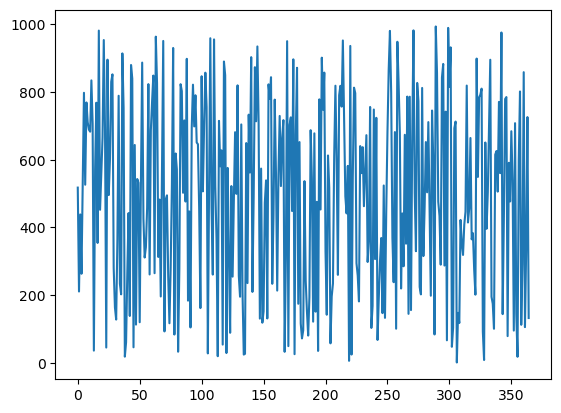

In [21]:
df_gesamt["Umsatz_C_Ausland"].plot()

In [22]:
df_gesamt["Datum"] = pd.to_datetime(df_gesamt["Datum"])

C:\Users\User\AppData\Local\Temp\ipykernel_8212\3398532268.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_gesamt["Datum"] = pd.to_datetime(df_gesamt["Datum"])


In [23]:
df_gesamt.dtypes

Datum                    datetime64[ns]
Umsatz_C_Ausland                float64
Umsatz_A_Ausland                float64
Umsatz_B_Ausland                float64
Umsatz_gesamt_Ausland           float64
dtype: object

In [24]:
df_gesamt

,Datum,Umsatz_C_Ausland,Umsatz_A_Ausland,Umsatz_B_Ausland,Umsatz_gesamt_Ausland
0,2021-01-01,517.78383,17.132115,50.000005,584.915950
1,2021-02-01,210.76096,57.353725,97.000000,365.114685
2,2021-03-01,438.47352,114.746857,60.000000,613.220377
3,2021-04-01,263.19869,113.251181,95.000000,471.449871
4,2021-05-01,535.95553,4.186462,4.000000,544.141992
...,...,...,...,...,...
360,2021-12-27,858.86110,48.681712,15.000000,922.542812
361,2021-12-28,105.59890,54.774542,64.000000,224.373442
362,2021-12-29,340.43550,151.450508,43.000000,534.886008
363,2021-12-30,726.17010,39.406492,99.000000,864.576592


In [25]:
#df_gesamt.to_csv(r"C:\Users\User\Documents\GitHub\Praxisprojekt_Modul_2.2_Breakout2\Daten\Umsatz_Ausland_Tage.csv")

In [26]:
df_gesamt["Umsatz_C_Ausland"].sum()

181132.98105

In [27]:
#df_gesamt["Datum"] = pd.to_datetime(df_gesamt["Datum"])
df_gesamt_monat= df_gesamt.groupby(pd.Grouper(key="Datum", freq="M")).sum() #df.set_index("Date").resample("1M").sum()
df_gesamt_monat["Umsatz_A_Ausland"]=df_gesamt_monat["Umsatz_A_Ausland"].round(2)
df_gesamt_monat["Umsatz_B_Ausland"]=df_gesamt_monat["Umsatz_B_Ausland"].round(2)
df_gesamt_monat["Umsatz_C_Ausland"]=df_gesamt_monat["Umsatz_C_Ausland"].round(2)
df_gesamt_monat["Umsatz_gesamt_Ausland"]=df_gesamt_monat["Umsatz_gesamt_Ausland"].round(2)
df_gesamt_monat

,Umsatz_C_Ausland,Umsatz_A_Ausland,Umsatz_B_Ausland,Umsatz_gesamt_Ausland
Datum,,,,
2021-01-31,15494.83,1897.14,1478.0,18869.97
2021-02-28,13204.74,1450.65,1349.0,16004.40
2021-03-31,15034.96,1752.35,1369.0,18156.30
2021-04-30,14714.37,1423.80,1375.0,17513.17
2021-05-31,14771.97,1434.76,1470.0,17676.73
2021-06-30,16086.88,1662.89,1462.0,19211.77
2021-07-31,15029.18,2157.21,1781.0,18967.38
2021-08-31,14349.50,1725.48,1745.0,17819.99
2021-09-30,16560.05,1210.21,1515.0,19285.26


In [28]:
df_gesamt_monat = df_gesamt_monat.reset_index()

<Axes: >

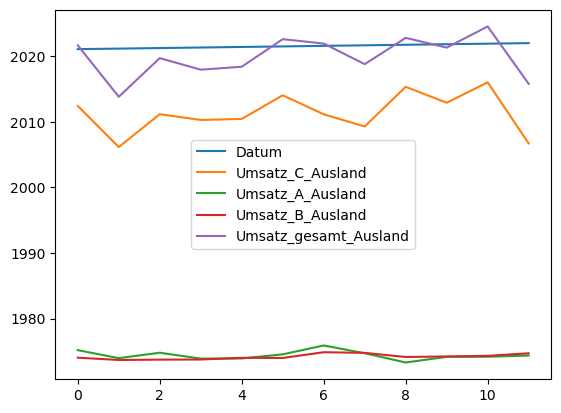

In [29]:
df_gesamt_monat.plot()

In [30]:
df_gesamt_monat["Datum"] = df_gesamt_monat["Datum"].dt.strftime("%b")
df_gesamt_monat

,Datum,Umsatz_C_Ausland,Umsatz_A_Ausland,Umsatz_B_Ausland,Umsatz_gesamt_Ausland
0,Jan,15494.83,1897.14,1478.0,18869.97
1,Feb,13204.74,1450.65,1349.0,16004.40
2,Mar,15034.96,1752.35,1369.0,18156.30
3,Apr,14714.37,1423.80,1375.0,17513.17
4,May,14771.97,1434.76,1470.0,17676.73
5,Jun,16086.88,1662.89,1462.0,19211.77
6,Jul,15029.18,2157.21,1781.0,18967.38
7,Aug,14349.50,1725.48,1745.0,17819.99
8,Sep,16560.05,1210.21,1515.0,19285.26
9,Oct,15671.86,1522.83,1547.0,18741.68


In [31]:
df_gesamt_monat.set_index("Datum")

,Umsatz_C_Ausland,Umsatz_A_Ausland,Umsatz_B_Ausland,Umsatz_gesamt_Ausland
Datum,,,,
Jan,15494.83,1897.14,1478.0,18869.97
Feb,13204.74,1450.65,1349.0,16004.40
Mar,15034.96,1752.35,1369.0,18156.30
Apr,14714.37,1423.80,1375.0,17513.17
May,14771.97,1434.76,1470.0,17676.73
Jun,16086.88,1662.89,1462.0,19211.77
Jul,15029.18,2157.21,1781.0,18967.38
Aug,14349.50,1725.48,1745.0,17819.99
Sep,16560.05,1210.21,1515.0,19285.26


In [31]:
df_gesamt_monat

,Datum,Umsatz_C_Ausland,Umsatz_A_Ausland,Umsatz_B_Ausland,Umsatz_gesamt_Ausland
0,Jan,15494.83,1897.14,1478.0,18869.97
1,Feb,13204.74,1450.65,1349.0,16004.40
2,Mar,15034.96,1752.35,1369.0,18156.30
3,Apr,14714.37,1423.80,1375.0,17513.17
4,May,14771.97,1434.76,1470.0,17676.73
5,Jun,16086.88,1662.89,1462.0,19211.77
6,Jul,15029.18,2157.21,1781.0,18967.38
7,Aug,14349.50,1725.48,1745.0,17819.99
8,Sep,16560.05,1210.21,1515.0,19285.26
9,Oct,15671.86,1522.83,1547.0,18741.68


In [32]:
#df_gesamt_monat.to_csv(r"C:\Users\User\Documents\GitHub\Praxisprojekt_Modul_2.2_Breakout2\Daten\Umsatz_Ausland_Monat.csv")

In [32]:
df_gesamt_monat.describe()

,Umsatz_C_Ausland,Umsatz_A_Ausland,Umsatz_B_Ausland,Umsatz_gesamt_Ausland
count,12.000000,12.000000,12.000000,12.000000
mean,15094.415833,1613.683333,1532.833333,18240.931667
std,1119.904642,249.185117,148.551695,1142.173492
min,13204.740000,1210.210000,1349.000000,16004.400000
25%,14623.152500,1446.677500,1440.250000,17635.840000
50%,15032.070000,1563.440000,1496.500000,18448.990000
75%,15775.615000,1732.197500,1616.250000,19028.477500
max,16808.340000,2157.210000,1781.000000,19918.390000
